In [2]:
import pandas as pd
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shrni\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#crating panda dataframe form csv
rawdata = pd.read_csv('C:/Users/shrni/OneDrive/Desktop/Hacathon/aEC7hZ.csv', sep='\t')

In [19]:
rawdata.head(5)

,id,type,legislationType,author,author_alternateName,name,description,articleBody,text,printEdition,...,keywords,mentions,duration,contentUrl,about,inLanguage,contentLocation,associatedMedia,sdDatePublished,updatetime
0,iCANDID_twitter_1568208936423096321,Message,NaN,La Libre,@lalibrebe,🔴Charles III prononcera son premier discours à...,NaN,NaN,🔴Charles III prononcera son premier discours à...,NaN,...,NaN,NaN,NaN,NaN,French,NaN,https://pbs.twimg.com/media/FcNlMOYWAAQSGDp.jp...,2023-02-13T12:18:31.939327866Z,2023-02-13T12:18:31.939327866Z,NaN
1,iCANDID_twitter_1567852288735059970,Message,NaN,L'Echo,@lecho,"La santé de la reine #ElizabethII inquiète, Ch...",NaN,NaN,"La santé de la reine #ElizabethII inquiète, Ch...",NaN,...,Camille Berkenbaum,NaN,NaN,NaN,French,NaN,https://pbs.twimg.com/media/FcIhEC_XkAgIP1L.jp...,2023-02-13T12:11:40.950936604Z,2023-02-13T12:11:40.950936604Z,NaN
2,iCANDID_twitter_1567929575111532544,Message,NaN,jamal small d democrat,@jagallow,In blessed memory Queen Elizabth II #QueenEliz...,NaN,NaN,In blessed memory Queen Elizabth II #QueenEliz...,NaN,...,NaN,NaN,NaN,NaN,English,NaN,NaN,2023-02-13T13:44:09.241703013Z,2023-02-13T13:44:09.241703013Z,NaN
3,iCANDID_twitter_1567929574985457664,Message,NaN,Henna (Available now),@hennalilacstar,I can't #QueenElizabeth RIP💔,NaN,NaN,I can't #QueenElizabeth RIP💔,NaN,...,NaN,NaN,NaN,NaN,English,NaN,NaN,2023-02-13T13:44:09.242027513Z,2023-02-13T13:44:09.242027513Z,NaN
4,iCANDID_twitter_1567929574826323974,Message,NaN,Ivan,@Zeldris117,Rest in peace. We will miss you #QueenElizabe...,NaN,NaN,Rest in peace. We will miss you #QueenElizabe...,NaN,...,NaN,NaN,NaN,NaN,English,NaN,https://pbs.twimg.com/tweet_video_thumb/FcJnoj...,2023-02-13T13:44:09.242231411Z,2023-02-13T13:44:09.242231411Z,NaN


In [4]:
#removng unnecessary columns
cleandata = rawdata.drop(['sender', 'sender_alternateName', 'description', 'legislationType', 'recipient', 'recipient_alternateName', 'type', 'legislationPassedBy', 'legislationResponsible', 'articleBody','printEdition','articleSection', 'name', 'retweet', 'url', 'provider', 'publisher', 'pagination', 'mentions', 'duration', 'contentUrl', 'inLanguage', 'associatedMedia', 'sdDatePublished', 'updatetime'], axis=1)

In [5]:
#rename some columns
cleandata.rename(columns={"author_alternateName": "authorhandle",  "name": "tweet","datePublished": "publicationdate", "about": "language", "text": "tweet", "publicationdate": "hashtags", "contentLocation": "images"}, inplace=True)

In [9]:
cleandata.head()

,id,author,authorhandle,tweet,publicationdate,link,hashtags,keywords,language,images
0,iCANDID_twitter_1568208936423096321,La Libre,@lalibrebe,🔴Charles III prononcera son premier discours à...,2022-09-09,https://twitter.com/temp/status/15682089364230...,"QueenElizabeth, CharlesIII, Londres, buckingha...",NaN,French,https://pbs.twimg.com/media/FcNlMOYWAAQSGDp.jp...
1,iCANDID_twitter_1567852288735059970,L'Echo,@lecho,"La santé de la reine #ElizabethII inquiète, Ch...",2022-09-08,https://twitter.com/temp/status/15678522887350...,"ElizabethII, RoyaumeUni, UK, QueenElizabeth",Camille Berkenbaum,French,https://pbs.twimg.com/media/FcIhEC_XkAgIP1L.jp...
2,iCANDID_twitter_1567929575111532544,jamal small d democrat,@jagallow,In blessed memory Queen Elizabth II #QueenEliz...,2022-09-08,https://twitter.com/temp/status/15679295751115...,QueenElizabeth,NaN,English,NaN
3,iCANDID_twitter_1567929574985457664,Henna (Available now),@hennalilacstar,I can't #QueenElizabeth RIP💔,2022-09-08,https://twitter.com/temp/status/15679295749854...,QueenElizabeth,NaN,English,NaN
4,iCANDID_twitter_1567929574826323974,Ivan,@Zeldris117,Rest in peace. We will miss you #QueenElizabe...,2022-09-08,https://twitter.com/temp/status/15679295748263...,QueenElizabeth,NaN,English,https://pbs.twimg.com/tweet_video_thumb/FcJnoj...


In [6]:
#sort tweets based on date of publishing, olsest to newest 
cleandata.sort_values('publicationdate')

,id,author,authorhandle,tweet,publicationdate,link,hashtags,keywords,language,images
109978,iCANDID_twitter_1565366528408797186,Mae,@BabyMaeXena,One reason to not unalive. Queen Elizabeth wil...,2022-09-01,https://twitter.com/temp/status/15653665284087...,"mentalhealth, QueenElizabeth",NaN,English,NaN
346181,iCANDID_twitter_1565381711021703169,Carol. ❤️🏴󠁧󠁢󠁷󠁬󠁳󠁿,@Carol36994460,#AbolishTheMonarchy #AbolishTheMonarchy #Aboli...,2022-09-01,https://twitter.com/temp/status/15653817110217...,"AbolishTheMonarchy, AbolishTheMonarchy, Abolis...",NaN,English,NaN
346180,iCANDID_twitter_1565385515658088449,Beatrice,@Beatriceijang,@etnow #AbolishTheMonarchy,2022-09-01,https://twitter.com/temp/status/15653855156580...,AbolishTheMonarchy,Entertainment Tonight,Undetermined,NaN
346179,iCANDID_twitter_1565420256377675779,Campaign to Abolish the Monarchy,@nomoremonarchs,@JeremyVineOn5 The monarchy is bad for Britain...,2022-09-01,https://twitter.com/temp/status/15654202563776...,AbolishTheMonarchy,Jeremy Vine On 5,English,NaN
346178,iCANDID_twitter_1565421787806056449,TeeMaa,@tma285,#AbolishTheMonarchy https://t.co/wTudNfgIYE,2022-09-01,https://twitter.com/temp/status/15654217878060...,AbolishTheMonarchy,NaN,Undetermined,NaN
...,...,...,...,...,...,...,...,...,...,...
347447,iCANDID_twitter_1571756826127134722,Our World,@MeetOurWorld,#Buckingham Palace releases a new image of #Qu...,2022-09-19,https://twitter.com/temp/status/15717568261271...,"Buckingham, QueenElizabethII, QueenElizabeth",NaN,English,https://pbs.twimg.com/media/Fc__zP_aMAEX_m1.jp...
347448,iCANDID_twitter_1571756465454743552,Kaye Nightingale 😎,@kayenightingale,Westminster Hall is vast The coffin of Her La...,2022-09-19,https://twitter.com/temp/status/15717564654547...,QueenElizabeth,NaN,English,NaN
347449,iCANDID_twitter_1571756447565811712,ThembaLamaNtshaba,@lindamnkhonto,Never! But here is Cyril Ramaphosa attending a...,2022-09-19,https://twitter.com/temp/status/15717564475658...,"QueenElizabethIIMemorial, QueenElizabethII, Qu...",NaN,English,NaN
347478,iCANDID_twitter_1571748446066933762,Jack Rose (JCK),@JackRoseReal,Peace in heaven. Rest with angels Queen Elizab...,2022-09-19,https://twitter.com/temp/status/15717484460669...,"Respect, QueenElizabeth, funeral",NaN,English,https://pbs.twimg.com/media/Fc_44asXwAEtng5.jp...


In [7]:
#With this piece of code a column named "sentiment" is added to the dataframe which varies between -1 yo +1.
#0 means nutral sentiments, + range means positive and - range is negetive sentiment.

sid = SentimentIntensityAnalyzer()

cleandata['sentiment'] = cleandata['tweet'].apply(lambda text: sid.polarity_scores(text)['compound'])


In [9]:
cleandata.to_csv('C:/Users/shrni/OneDrive/Desktop/Hacathon/sentiment.csv', index=False)

In [8]:
cleandata.head()

,id,author,authorhandle,tweet,publicationdate,link,hashtags,keywords,language,images,sentiment
0,iCANDID_twitter_1568208936423096321,La Libre,@lalibrebe,🔴Charles III prononcera son premier discours à...,2022-09-09,https://twitter.com/temp/status/15682089364230...,"QueenElizabeth, CharlesIII, Londres, buckingha...",NaN,French,https://pbs.twimg.com/media/FcNlMOYWAAQSGDp.jp...,0.0000
1,iCANDID_twitter_1567852288735059970,L'Echo,@lecho,"La santé de la reine #ElizabethII inquiète, Ch...",2022-09-08,https://twitter.com/temp/status/15678522887350...,"ElizabethII, RoyaumeUni, UK, QueenElizabeth",Camille Berkenbaum,French,https://pbs.twimg.com/media/FcIhEC_XkAgIP1L.jp...,0.0000
2,iCANDID_twitter_1567929575111532544,jamal small d democrat,@jagallow,In blessed memory Queen Elizabth II #QueenEliz...,2022-09-08,https://twitter.com/temp/status/15679295751115...,QueenElizabeth,NaN,English,NaN,0.5994
3,iCANDID_twitter_1567929574985457664,Henna (Available now),@hennalilacstar,I can't #QueenElizabeth RIP💔,2022-09-08,https://twitter.com/temp/status/15679295749854...,QueenElizabeth,NaN,English,NaN,0.0000
4,iCANDID_twitter_1567929574826323974,Ivan,@Zeldris117,Rest in peace. We will miss you #QueenElizabe...,2022-09-08,https://twitter.com/temp/status/15679295748263...,QueenElizabeth,NaN,English,https://pbs.twimg.com/tweet_video_thumb/FcJnoj...,0.4404


In [ ]:
plt.figure()
ax4 = cleandata[['sentiment']].plot(
    kind='bar',
    title ="sentiment of tweets",
    figsize=(100, 10),
    legend=True,
    fontsize=8)

ax4.yaxis.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

In [8]:
sentiment_by_date = cleandata.groupby('publicationdate')['sentiment'].mean()
sentiment_by_date

publicationdate
2022-09-01   -0.062483
2022-09-02    0.055569
2022-09-03    0.009469
2022-09-04   -0.083355
2022-09-05    0.018312
2022-09-06    0.037604
2022-09-07    0.047000
2022-09-08    0.054000
2022-09-09    0.039252
2022-09-10    0.033512
2022-09-11    0.041425
2022-09-12    0.020067
2022-09-13    0.014236
2022-09-14    0.018546
2022-09-15    0.031937
2022-09-16    0.075981
2022-09-17    0.071220
2022-09-18    0.052412
2022-09-19    0.073692
Name: sentiment, dtype: float64

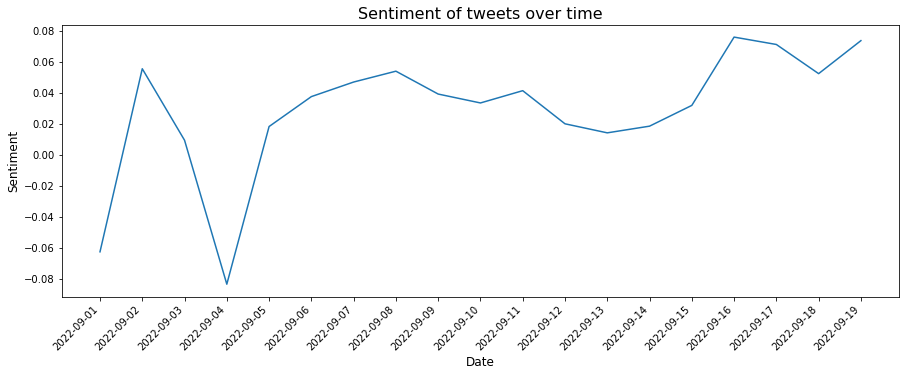

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(sentiment_by_date.index, sentiment_by_date.values)

# Set the chart title and axis labels
plt.title('Sentiment of tweets over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [9]:
sentiment_by_author = cleandata.groupby('author')['sentiment'].mean()
sentiment_by_author

author
 Abrar Intisar               0.000000
 Kevin Barreno               0.000000
 TEAM SLAMOLA                0.000000
!                            0.041667
! IMAD’🧃                     0.000000
                               ...   
🫶🏻💕                         -0.652300
🫶🏽                          -0.278700
🫶🏾                          -0.047250
🫶🏿                           0.210750
𠮷村 兼庚/Kanetoshi.Yoshimura    0.000000
Name: sentiment, Length: 297938, dtype: float64

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(sentiment_by_author.index, sentiment_by_author.values)

# Set the chart title and axis labels
plt.title('Sentiment of tweets by users', fontsize=16)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [10]:
sentiment_by_hashtag = cleandata.groupby('hashtags')['sentiment'].mean()
sentiment_by_hashtag

hashtags
07DeSetembroHistorico, ForaBolsonaroeSuaQuadrilha, QueenElizabeth, Anitta, RockInRio                                0.000
08Sep, GodSaveTheQueen, ReinaIsabelII, QueenElizabeth, QueenElizabethII                                             0.000
08Sep, Isabel, QueenElizabeth, IsabelI                                                                             -0.296
08Sep, LadyDi, ReinaIsabel, PrincipeCarlos, QueenElizabeth                                                          0.000
08Sep, Mérida, QueenElizabeth                                                                                       0.000
                                                                                                                    ...  
𝐍𝐞𝐰𝐬𝐔𝐩𝐝𝐚𝐭𝐞, NFT, crypto, QueenElizabeth, NFTs, OpenSea, Government, Japan, localmayors, AnimocaBrands, JimCarrey   -0.453
𝑹𝑫𝑪, QueenElizabeth, ElizabethII, Elizabeth2, ElisabethII                                                           0.000
𝕊𝕃𝕆𝕋4𝔻, QueenEl

In [ ]:
sentiment_by_hashtag.head()

In [ ]:
plt.figure(figsize=(35, 10))
plt.bar(sentiment_by_hashtag.index, sentiment_by_hashtag.values)

# Set the chart title and axis labels
plt.title('Sentiment of Hashtags', fontsize=16)
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

KeyboardInterrupt: 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35226 (\N{CJK UNIFIED IDEOGRAPH-899A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3620 (\N{THAI CHARACTER RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3625 (\N{THAI CHARACTER SO RUSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 78064 (\N{EGYPTIAN HIEROGLYPH E026}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\li

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12490 (\N{KATAKANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12499 (\N{KATAKANA LETTER BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2990 (\N{TAMIL LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3009 (\N{TAMIL VOWEL SIGN U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2975 (\N{TAMIL LETTER TTA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPytho

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3599 (\N{THAI CHARACTER TO PATAK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37197 (\N{CJK UNIFIED IDEOGRAPH-914D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2358 (\N{DEVANAGARI LETTER SHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Progr

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12460 (\N{KATAKANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21106 (\N{CJK UNIFIED IDEOGRAPH-5272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20029 (\N{CJK UNIFIED IDEOGRAPH-4E3D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2949 (\N{TAMIL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12453 (\N{KATAKANA LETTER SMALL U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21435 (\N{CJK UNIFIED IDEOGRAPH-53BB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12408 (\N{HIRAGANA LETTER HE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3593 (\N{THAI CHARACTER CHO CHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65439 (\N{HALFWIDTH KATAKANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2951 (\N{TAMIL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2969 (\N{TAMIL LETTER NGA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2950 (\N{TAMIL LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\l

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3223 (\N{KANNADA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3250 (\N{KANNADA LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3270 (\N{KANNADA VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3264 (\N{KANNADA VOWEL SIGN II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26597 (\N{CJK UNIFIED IDEOGRAPH-67E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38666 (\N{CJK UNIFIED IDEOGRAPH-970A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26601 (\N{CJK UNIFIED IDEOGRAPH-67E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28207 (\N{CJK UNIFIED IDEOGRAPH-6E2F}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2742 (\N{GUJARATI LETTER SHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2752 (\N{GUJARATI VOWEL SIGN II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2754 (\N{GUJARATI VOWEL SIGN UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2724 (\N{GUJARATI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2764 (\N{GUJARATI VOWEL SIGN AU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anacond

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23470 (\N{CJK UNIFIED IDEOGRAPH-5BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27583 (\N{CJK UNIFIED IDEOGRAPH-6BBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32004 (\N{CJK UNIFIED IDEOGRAPH-7D04}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23273 (\N{CJK UNIFIED IDEOGRAPH-5AE9}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20808 (\N{CJK UNIFIED IDEOGRAPH-5148}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33322 (\N{CJK UNIFIED IDEOGRAPH-822A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Pr

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3214 (\N{KANNADA LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25144 (\N{CJK UNIFIED IDEOGRAPH-6238}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38915 (\N{CJK UNIFIED IDEOGRAPH-9803}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35328 (\N{CJK UNIFIED IDEOGRAPH-8A00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3015 (\N{TAMIL VOWEL SIGN EE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3602 (\N{THAI CHARACTER THO PHUTHAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28431 (\N{CJK UNIFIED IDEOGRAPH-6F0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33590 (\N{CJK UNIFIED IDEOGRAPH-8336}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Prog

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29356 (\N{CJK UNIFIED IDEOGRAPH-72AC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65366 (\N{FULLWIDTH LATIN SMALL LETTER V}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65345 (\N{FULLWIDTH LATIN SMALL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65360 (\N{FULLWIDTH LATIN SMALL LETTER P}) missing from current font.
  fig.canvas.print_fi

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37507 (\N{CJK UNIFIED IDEOGRAPH-9283}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25731 (\N{CJK UNIFIED IDEOGRAPH-6483}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25945 (\N{CJK UNIFIED IDEOGRAPH-6559}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12384 (\N{HIRAGANA LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36321 (\N{CJK UNIFIED IDEOGRAPH-8DE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28193 (\N{CJK UNIFIED IDEOGRAPH-6E21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35672 (\N{CJK UNIFIED IDEOGRAPH-8B58}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36012 (\N{CJK UNIFIED IDEOGRAPH-8CAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20219 (\N{CJK UNIFIED IDEOGRAPH-4EFB}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3020 (\N{TAMIL VOWEL SIGN AU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27507 (\N{CJK UNIFIED IDEOGRAPH-6B73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3545 (\N{SINHALA VOWEL SIGN KOMBUVA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3520 (\N{SINHALA LETTER VAYANNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\P

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20105 (\N{CJK UNIFIED IDEOGRAPH-4E89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32724 (\N{CJK UNIFIED IDEOGRAPH-7FD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 34899 (\N{CJK UNIFIED IDEOGRAPH-8853}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 40599 (\N{CJK UNIFIED IDEOGRAPH-9E97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26575 (\N{CJK UNIFIED IDEOGRAPH-67CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38728 (\N{CJK UNIFIED IDEOGRAPH-9748}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38931 (\N{CJK UNIFIED IDEOGRAPH-9813}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29066 (\N{CJK UNIFIED IDEOGRAPH-718A}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31077 (\N{CJK UNIFIED IDEOGRAPH-7965}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38498 (\N{CJK UNIFIED IDEOGRAPH-9662}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20853 (\N{CJK UNIFIED IDEOGRAPH-5175}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20845 (\N{CJK UNIFIED IDEOGRAPH-516D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31481 (\N{CJK UNIFIED IDEOGRAPH-7AF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28092 (\N{CJK UNIFIED IDEOGRAPH-6DBC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21451 (\N{CJK UNIFIED IDEOGRAPH-53CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26792 (\N{CJK UNIFIED IDEOGRAPH-68A8}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3390 (\N{MALAYALAM VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3358 (\N{MALAYALAM LETTER NYA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3405 (\N{MALAYALAM SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3356 (\N{MALAYALAM LETTER JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3378 (\N{MALAYALAM LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38283 (\N{CJK UNIFIED IDEOGRAPH-958B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28511 (\N{CJK UNIFIED IDEOGRAPH-6F5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27798 (\N{CJK UNIFIED IDEOGRAPH-6C96}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32260 (\N{CJK UNIFIED IDEOGRAPH-7E04}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39592 (\N{CJK UNIFIED IDEOGRAPH-9AA8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30703 (\N{CJK UNIFIED IDEOGRAPH-77EF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 40665 (\N{CJK UNIFIED IDEOGRAPH-9ED9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31095 (\N{CJK UNIFIED IDEOGRAPH-7977}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21560 (\N{CJK UNIFIED IDEOGRAPH-5438}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28716 (\N{CJK UNIFIED IDEOGRAPH-702C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24736 (\N{CJK UNIFIED IDEOGRAPH-60A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20135 (\N{CJK UNIFIED IDEOGRAPH-4EA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30403 (\N{CJK UNIFIED IDEOGRAPH-76C3}) missing from current font.
  fig.canvas.print_figure(bytes_

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20146 (\N{CJK UNIFIED IDEOGRAPH-4EB2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37666 (\N{CJK UNIFIED IDEOGRAPH-9322}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24509 (\N{CJK UNIFIED IDEOGRAPH-5FBD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31456 (\N{CJK UNIFIED IDEOGRAPH-7AE0}) missing from current font.
  fig.canvas.print_figure(bytes_

In [11]:
top_100_authors = cleandata.groupby('author')['tweet'].count().nlargest(100).index

# Print out the top 100 authors and their tweet counts
top_100_authors

Index(['🦅JEDI🇺🇸', 'ThatMediaBuzz', 'Nika6',
       'Top Banana Antiques Mall Tetbury 1, Gl 88 DS UK', 'Arad.golami',
       'Robert Crossland', 'Royal News', 'Talha Muneeb', 'Martin Brian Ansah',
       'Lord Weapons', '👑 DONalimaG', 'NᥲtᥲꙆɩᥲ 🕊', 'Summarizer (by Otherweb)',
       'Brijendra Lodhiji', '.', 'jose expert', 'Rokibul Islam', 'Louise',
       'TheBlackList', 'Oboh Francis Nkemakolam', 'Sonaaja22',
       'khmerxbxboi "HashTag Tester" (STOCK-GOD) 🇺🇸 🇰🇭', 'WalkaboutsVerse',
       'Mimi', 'صحيفة الاتحاد', 'Squeak ferch Glyndŵr, Tywysoges Cymru',
       'Txt Makan Krupuk', 'Tracy Yerden', 'وذكر بالقران', 'Anna Ratcliff',
       'Salina Reddy', 'World Sports Live TV', 'Jessica', 'Leicester Worker',
       'Football TV live', 'Rishi Sunak's Food Pantry',
       'Town Post. A New Century..', 'Sanjay Daslaniya', 'Retweeter',
       'Sami Adnan', 'Thanthi TV', 'ibrahim Gülmez', 'DMN Record 🌐🎶',
       'Alexander Rio', '🏳️‍🌈🥃🍸🎃🧡🖤Dan Baker🖤🧡🎃 🍸🥃🏳️‍🌈', 'GlobeSL News',
       'FLOSSIE'

In [14]:
data_top_users = cleandata[cleandata['author'].isin(top_100_authors)]
data_top_users

,id,author,authorhandle,tweet,publicationdate,link,hashtags,keywords,language,images,sentiment
31,iCANDID_twitter_1567929549887012864,ANDY GIBSON,@AndyGibsonTV,BREAKING NEWS: Queen Elizabeth has died. The Q...,2022-09-08,https://twitter.com/temp/status/15679295498870...,"TheQueen, QueenElizabeth, LondonBridge",NaN,English,https://pbs.twimg.com/media/FcJnnMVWAAE84fy.jp...,-0.0516
86,iCANDID_twitter_1567929481821622274,Hipster Spock 🇹🇼🇺🇸🇵🇱🖖🍥孤勇者,@Eurodude23,@business You don't see much elegance like thi...,2022-09-08,https://twitter.com/temp/status/15679294818216...,QueenElizabeth,Bloomberg,English,https://pbs.twimg.com/media/FcJnjK-X0AgJBBi.jp...,0.7388
223,iCANDID_twitter_1567922209150193664,NᥲtᥲꙆɩᥲ 🕊,@RoyalNavvy,"Pamiętajcie, że dopóki BBC nie potwierdzi śmie...",2022-09-08,https://twitter.com/temp/status/15679222091501...,QueenElizabeth,NaN,Polish,NaN,0.0000
271,iCANDID_twitter_1567921630180941824,L,@princessaals,a rainha elizabeth morreu? eu sei que não muda...,2022-09-08,https://twitter.com/temp/status/15679216301809...,"QueenElizabeth, rainhaelizabeth",NaN,Portuguese,NaN,0.0000
319,iCANDID_twitter_1567927135104278534,.,@AsadYoumna,Woman lived all lives #QueenElizabeth https:/...,2022-09-08,https://twitter.com/temp/status/15679271351042...,QueenElizabeth,NaN,English,https://pbs.twimg.com/media/FcJla1eXgAEzjjF.jp...,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
534886,iCANDID_twitter_1568836447859245056,"Top Banana Antiques Mall Tetbury 1, Gl 88 DS UK",@TopBananaMall,Paddington Bear By Gabriell... https://t.co/g2...,2022-09-11,https://twitter.com/temp/status/15688364478592...,"dogsoftwitter, antiquejewllery, gardensoftwitt...","Top Banana Antiques Mall Tetbury 1, Gl 88 DS UK",English,NaN,0.4588
534902,iCANDID_twitter_1568833603072659456,"Top Banana Antiques Mall Tetbury 1, Gl 88 DS UK",@TopBananaMall,fab @topbananaantiques #dogsoftwitter #antique...,2022-09-11,https://twitter.com/temp/status/15688336030726...,"dogsoftwitter, antiquejewllery, gardensoftwitt...",NaN,Undetermined,NaN,0.4588
534919,iCANDID_twitter_1568828761583517696,𓂺,@BlakGreenRed,#CNN reporter asks #British woman about #Queen...,2022-09-11,https://twitter.com/temp/status/15688287615835...,"CNN, British, QueenElizabeth, NotTheBiggestFan...",NaN,English,NaN,0.7479
534939,iCANDID_twitter_1568825126346432516,#MrInfluencerUg  🇺🇬🇳🇬🇬🇭🇿🇦,@MrInfluencerUg1,@Reuters King Charles III First public address...,2022-09-11,https://twitter.com/temp/status/15688251263464...,"QueenElizabeth, QueenElizabethII, QueenElizabe...",Reuters,English,NaN,0.3612


In [17]:
sentiment_by_top_user

author
#MrInfluencerUg  🇺🇬🇳🇬🇬🇭🇿🇦      0.041679
.                               0.035250
AIMO MAGARI DEALER 001🇰🇪🇰🇪      0.362122
ANDY GIBSON                    -0.008971
ANM News                       -0.005843
                                  ...   
𓂺                              -0.065644
🏳️‍🌈🥃🍸🎃🧡🖤Dan Baker🖤🧡🎃 🍸🥃🏳️‍🌈    0.119995
🏴🇪🇺🏳️‍🌈Strange Unusual🇵🇸🇪🇺🏴    -0.033740
👑 DONalimaG                    -0.788173
🦅JEDI🇺🇸                         0.000191
Name: sentiment, Length: 100, dtype: float64

In [21]:

# Group the data by user and calculate the average sentiment score for each user
sentiment_by_top_user = data_top_users.groupby('author')['sentiment'].mean()
sentiment_by_top_user.sort_values()

author
👑 DONalimaG                                      -0.788173
ThatMediaBuzz                                    -0.697143
mwafriqa                                         -0.486060
Sami Adnan                                       -0.472400
Mimi                                             -0.436758
                                                    ...   
Professional Services                             0.543176
khmerxbxboi "HashTag Tester" (STOCK-GOD) 🇺🇸 🇰🇭    0.580148
Rokibul Islam                                     0.581799
Adixoro                                           0.585900
Hipster Spock 🇹🇼🇺🇸🇵🇱🖖🍥孤勇者                         0.618208
Name: sentiment, Length: 100, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 59904 (\uea00) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127469 (\N{REGIONAL INDICATOR SYMBOL LETTER H}) missing from current font.
  fig.canvas.print_f

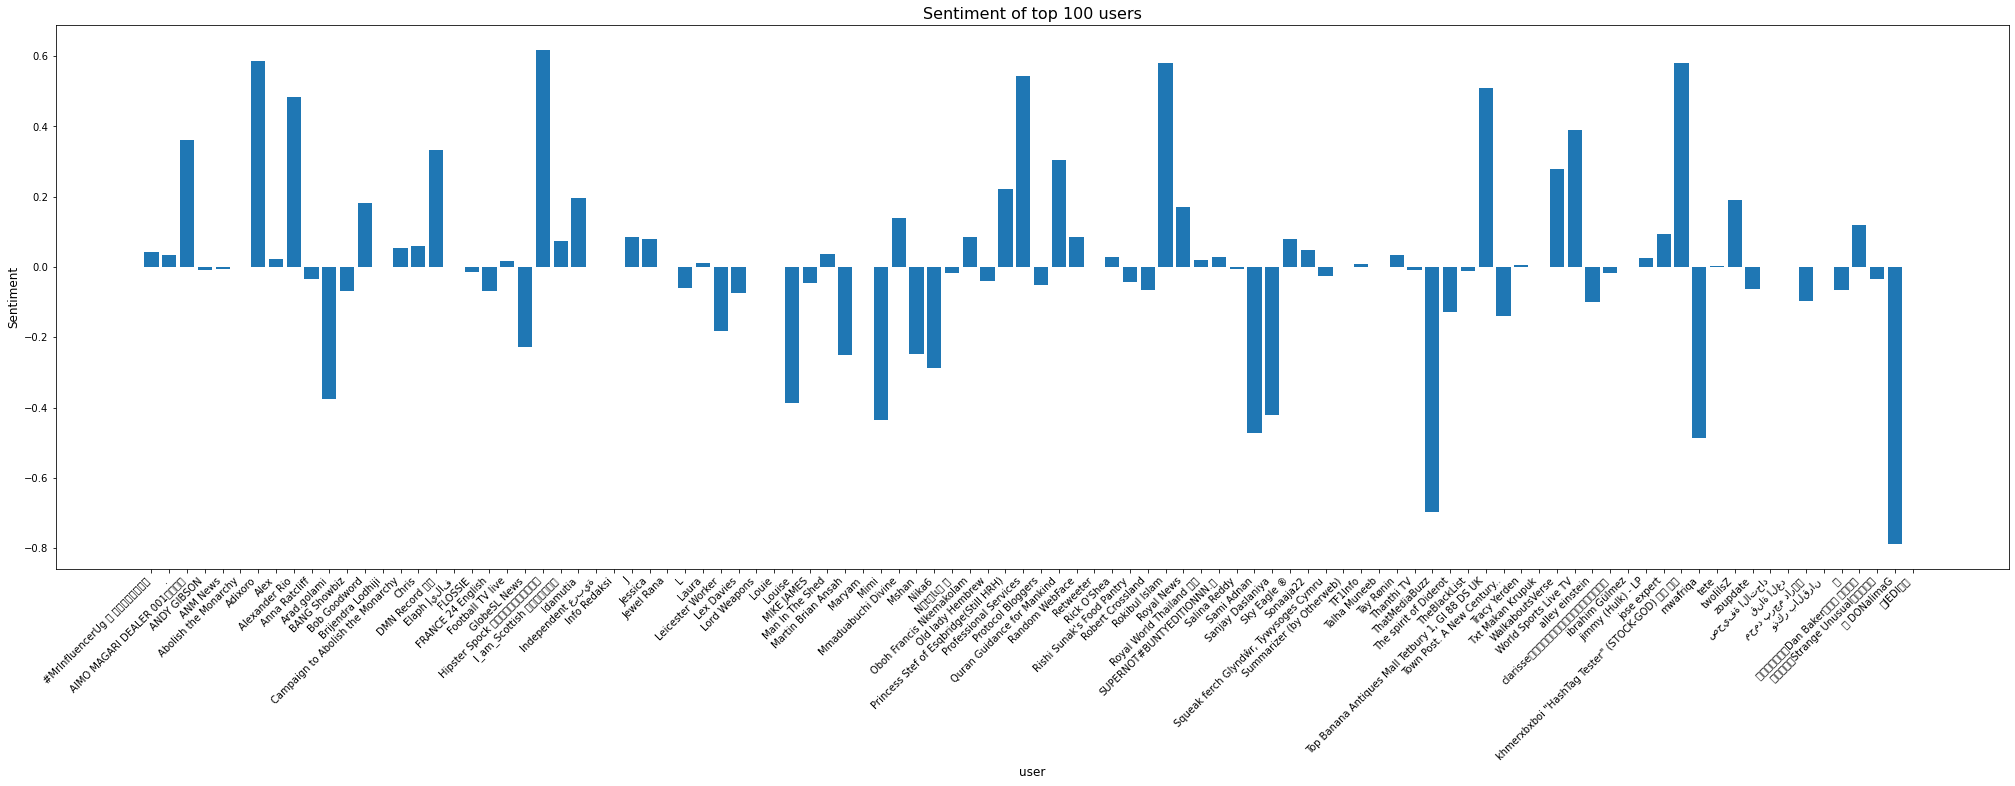

In [15]:
plt.figure(figsize=(35, 10))
plt.bar(sentiment_by_user.index, sentiment_by_user.values)

# Set the chart title and axis labels
plt.title('Sentiment of top 100 users', fontsize=16)
plt.xlabel('user', fontsize=12)
plt.ylabel('Sentiment', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

In [22]:
cleandata.loc[(cleandata['author'] == '👑 DONalimaG')]

,id,author,authorhandle,tweet,publicationdate,link,hashtags,keywords,language,images,sentiment
1018,iCANDID_twitter_1568740609761976322,👑 DONalimaG,@Alima1000,Dr K Andrews Racism is about power. It is abou...,2022-09-10,https://twitter.com/temp/status/15687406097619...,"Medscheme, QueenElizabeth, CMScares4u, QueenEl...",NelsonMandela,English,https://pbs.twimg.com/ext_tw_video_thumb/15687...,-0.7906
1020,iCANDID_twitter_1568739619503542272,👑 DONalimaG,@Alima1000,Dr K Andrews Racism is about power. It is abou...,2022-09-10,https://twitter.com/temp/status/15687396195035...,"Medscheme, QueenElizabeth, CMScares4u, QueenEl...",NelsonMandela,English,https://pbs.twimg.com/ext_tw_video_thumb/15687...,-0.7906
1835,iCANDID_twitter_1568461355166085122,👑 DONalimaG,@Alima1000,Dr K Andrews Racism is about power. It is abou...,2022-09-10,https://twitter.com/temp/status/15684613551660...,"Medscheme, QueenElizabeth",NaN,English,https://pbs.twimg.com/ext_tw_video_thumb/15684...,-0.8126
1856,iCANDID_twitter_1568458401667059712,👑 DONalimaG,@Alima1000,Dr K Andrews Racism is about power. It is abou...,2022-09-10,https://twitter.com/temp/status/15684584016670...,"Medscheme, QueenElizabeth",NaN,English,https://pbs.twimg.com/ext_tw_video_thumb/15684...,-0.8126
1963,iCANDID_twitter_1568493010605801472,👑 DONalimaG,@Alima1000,Dr K Andrews Racism is about power. It is abou...,2022-09-10,https://twitter.com/temp/status/15684930106058...,"Medscheme, QueenElizabeth",NaN,English,https://pbs.twimg.com/ext_tw_video_thumb/15684...,-0.8126
...,...,...,...,...,...,...,...,...,...,...,...
534482,iCANDID_twitter_1571330813194551296,👑 DONalimaG,@Alima1000,#Loadshedding #DrAndrews Racism is about power...,2022-09-18,https://twitter.com/temp/status/15713308131945...,"Loadshedding, DrAndrews, Medscheme, QueenEliza...",NaN,English,NaN,-0.7906
534485,iCANDID_twitter_1571330109713309696,👑 DONalimaG,@Alima1000,#Loadshedding #DrAndrews Racism is about power...,2022-09-18,https://twitter.com/temp/status/15713301097133...,"Loadshedding, DrAndrews, Medscheme, QueenEliza...",NaN,English,NaN,-0.7906
534487,iCANDID_twitter_1571328960486580226,👑 DONalimaG,@Alima1000,#Loadshedding #DrAndrews Racism is about power...,2022-09-18,https://twitter.com/temp/status/15713289604865...,"Loadshedding, DrAndrews, Medscheme, QueenEliza...",NaN,English,NaN,-0.7906
534489,iCANDID_twitter_1571328472592809986,👑 DONalimaG,@Alima1000,#Loadshedding #DrAndrews Racism is about power...,2022-09-18,https://twitter.com/temp/status/15713284725928...,"Loadshedding, DrAndrews, Medscheme, QueenEliza...",NaN,English,NaN,-0.7906


In [30]:
pd.options.display.max_colwidth = None

cleandata.loc[(cleandata['author'] == 'ThatMediaBuzz'), :'publicationdate']

,id,author,authorhandle,tweet,publicationdate
18211,iCANDID_twitter_1569101614509596673,ThatMediaBuzz,@thatmediabuzz,"@ETCanada @jamesbarkerband @Dallasmith @CherylHickeyETC Queen Elizabeth's son King Charles III was known to have a temper as a Prince. Watch the New King furiously snap at an Aide for not moving a Pen he could have moved himself. In Scotland, the King was BOOed. https://t.co/mKeRFTHFGN #QueenElizabeth #Meghanmarkle #KingCharlesIII",2022-09-11
18275,iCANDID_twitter_1569071327189020673,ThatMediaBuzz,@thatmediabuzz,"@guardian Queen Elizabeth's son King Charles III was known to have a temper as a Prince. Watch the New King furiously snap at an Aide for not moving a Pen he could have moved himself. In Scotland, the King was BOOed. https://t.co/mKeRFTIdwl #QueenElizabeth #Meghanmarkle #KingCharlesIII",2022-09-11
18276,iCANDID_twitter_1569071100117516293,ThatMediaBuzz,@thatmediabuzz,"@BuzzFeedNews Queen Elizabeth's son King Charles III was known to have a temper as a Prince. Watch the New King furiously snap at an Aide for not moving a Pen he could have moved himself. In Scotland, the King was BOOed. https://t.co/mKeRFTHFGN #QueenElizabeth #Meghanmarkle #KingCharlesIII",2022-09-11
18280,iCANDID_twitter_1569070664497119233,ThatMediaBuzz,@thatmediabuzz,"@DailyMailUK Queen Elizabeth's son King Charles III was known to have a temper as a Prince. Watch the New King furiously snap at an Aide for not moving a Pen he could have moved himself. In Scotland, the King was BOOed. https://t.co/mKeRFTHFGN #QueenElizabeth #Meghanmarkle #KingCharlesIII",2022-09-11
18282,iCANDID_twitter_1569070346799665153,ThatMediaBuzz,@thatmediabuzz,"@people Queen Elizabeth's son King Charles III was known to have a temper as a Prince. Watch the New King furiously snap at an Aide for not moving a Pen he could have moved himself. In Scotland, the King was BOOed. https://t.co/mKeRFTHFGN #QueenElizabeth #Meghanmarkle #KingCharlesIII",2022-09-11
...,...,...,...,...,...
518357,iCANDID_twitter_1569100148738760705,ThatMediaBuzz,@thatmediabuzz,"@1996Biggs @kelechnekoff Queen Elizabeth's son King Charles III was known to have a temper as a Prince. Watch the New King furiously snap at an Aide for not moving a Pen he could have moved himself. In Scotland, the King was BOOed. https://t.co/mKeRFTHFGN #QueenElizabeth #Meghanmarkle #KingCharlesIII",2022-09-11
518358,iCANDID_twitter_1569100054752858115,ThatMediaBuzz,@thatmediabuzz,"@thehill Queen Elizabeth's son King Charles III was known to have a temper as a Prince. Watch the New King furiously snap at an Aide for not moving a Pen he could have moved himself. In Scotland, the King was BOOed. https://t.co/mKeRFTHFGN #QueenElizabeth #Meghanmarkle #KingCharlesIII",2022-09-11
534580,iCANDID_twitter_1571399432255463426,ThatMediaBuzz,@thatmediabuzz,@FoxNews Watch King Charles III throw a Tantrum like a child over a leaking pen. Does the new King and son of Queen Elizabeth II have a temper problem or is he just spoilt? #QueenElizabeth #Queen #MeghanMarkle #KingCharlesIII #HarryandMeghan https://t.co/fsUgKHk3LR,2022-09-18
534586,iCANDID_twitter_1571397041716084736,ThatMediaBuzz,@thatmediabuzz,@MetroUK Watch King Charles III throw a Tantrum like a child over a leaking pen. Does the new King and son of Queen Elizabeth II have a temper problem or is he just spoilt? #QueenElizabeth #Queen #MeghanMarkle #KingCharlesIII #HarryandMeghan https://t.co/fsUgKHk3LR,2022-09-18


In [31]:
pd.options.display.max_colwidth = None

cleandata.loc[(cleandata['author'] == 'mwafriqa'), :'publicationdate']

,id,author,authorhandle,tweet,publicationdate
55891,iCANDID_twitter_1568222069036576773,mwafriqa,@mwafriqa1,@LittleRedHeidi #kenyans # #Africans suffered alot #AbolishTheMonarchy #BlackTwitter #IrishTwitter,2022-09-09
55895,iCANDID_twitter_1568221117436895233,mwafriqa,@mwafriqa1,@emalemon2110 #kenyans # #Africans suffered alot #AbolishTheMonarchy #BlackTwitter #IrishTwitter,2022-09-09
55922,iCANDID_twitter_1568213594453442563,mwafriqa,@mwafriqa1,@Joseph_w1990 #kenyans &amp; #Africans suffered #AbolishTheMonarchy #BlackTwitter,2022-09-09
55931,iCANDID_twitter_1568210000153137153,mwafriqa,@mwafriqa1,@SpiritofLenin #kenyans &amp; #Africans suffered #AbolishTheMonarchy #BlackTwitter,2022-09-09
55932,iCANDID_twitter_1568209918468964353,mwafriqa,@mwafriqa1,@SpiritofLenin #kenyans &amp; #Africans suffered #AbolishTheMonarchy #BlackTwitter,2022-09-09
...,...,...,...,...,...
508832,iCANDID_twitter_1568206885454598144,mwafriqa,@mwafriqa1,@ConorEForde #kenyans &amp; #Africans suffered #AbolishTheMonarchy,2022-09-09
508835,iCANDID_twitter_1568206187941732354,mwafriqa,@mwafriqa1,@TheDreadBoss @HaleAmanO #kenyans &amp; #Africans suffered #AbolishTheMonarchy,2022-09-09
508838,iCANDID_twitter_1568205795896049664,mwafriqa,@mwafriqa1,@Gattuso155 @frankie_dux #kenyans &amp; #Africans suffered #AbolishTheMonarchy,2022-09-09
508842,iCANDID_twitter_1568204809563430914,mwafriqa,@mwafriqa1,@jonsopel @BorisJohnson #kenyans &amp; #Africans suffered #AbolishTheMonarchy,2022-09-09


In [32]:
pd.options.display.max_colwidth = None

cleandata.loc[(cleandata['author'] == 'Sami Adnan'), :'publicationdate']

,id,author,authorhandle,tweet,publicationdate
1820,iCANDID_twitter_1568539996562378752,Sami Adnan,@SamiAdn00298163,"@sportsvilagesq3 There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/3szKa2Heox",2022-09-10
2305,iCANDID_twitter_1568539691376312322,Sami Adnan,@SamiAdn00298163,"@10rakluck There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/Ih9WJuL1zX",2022-09-10
2313,iCANDID_twitter_1568538971998658562,Sami Adnan,@SamiAdn00298163,"@t6lyssa There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/5Oy77afnFK",2022-09-10
2329,iCANDID_twitter_1568537897086615552,Sami Adnan,@SamiAdn00298163,"@GG_NNN956 There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/FV8ZWOax9v",2022-09-10
2339,iCANDID_twitter_1568537604592734212,Sami Adnan,@SamiAdn00298163,"@DREAMERING96 There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/4DAlZI34oD",2022-09-10
...,...,...,...,...,...
500320,iCANDID_twitter_1568530272051757058,Sami Adnan,@SamiAdn00298163,"@20BitHomo There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/iY2Y7LYiF7",2022-09-10
500511,iCANDID_twitter_1568528480412786688,Sami Adnan,@SamiAdn00298163,"@toranekoec @sweet_pandachan @crypto_warrier There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/ljz0T6k9o8",2022-09-10
500771,iCANDID_twitter_1568540767785721858,Sami Adnan,@SamiAdn00298163,"@ARTHURGCARTER1 @ARYNEWSOFFICIAL There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/fMfLYZfgVh",2022-09-10
500783,iCANDID_twitter_1568539855554060288,Sami Adnan,@SamiAdn00298163,"@Kent__World There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/eMLWq1Ghha #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/F9AsXNJwkj",2022-09-10


In [33]:
pd.options.display.max_colwidth = None

cleandata.loc[(cleandata['author'] == 'Mimi'), :'publicationdate']

,id,author,authorhandle,tweet,publicationdate
1940,iCANDID_twitter_1568495636420657152,Mimi,@Mimi62346463,"@MEEGA_SAMURAI3 There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/zTF5LAc1J9",2022-09-10
1941,iCANDID_twitter_1568495429352038402,Mimi,@Mimi62346463,"@IamViraj002 @tradingview @binance @kucoincom @CoinDCX @MEXC_Global @HuobiGlobal There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/Ep99nGWOhE",2022-09-10
1955,iCANDID_twitter_1568494031466033152,Mimi,@Mimi62346463,"@CoininizCom There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/07fWfj3jzQ",2022-09-10
1956,iCANDID_twitter_1568493977091059712,Mimi,@Mimi62346463,"@ivanlopezgimeno There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/O8rpsGFj2j",2022-09-10
1957,iCANDID_twitter_1568493917070569472,Mimi,@Mimi62346463,"@ElliotTR001 There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/W4yrp96o6w",2022-09-10
...,...,...,...,...,...
525397,iCANDID_twitter_1568244673877274624,Mimi,@Mimi62346463,"@ShidoFinance There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/qfRVS09LtF",2022-09-09
525456,iCANDID_twitter_1568243279766093824,Mimi,@Mimi62346463,"@drisk_io There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/5bVfUQtWxS",2022-09-09
525460,iCANDID_twitter_1568243212850188294,Mimi,@Mimi62346463,"@Piupdates There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/eWO7jnZtwR",2022-09-09
525477,iCANDID_twitter_1568242758451884034,Mimi,@Mimi62346463,"@BenAtreidesVing There is no bear market with @GrowMoonBSC, #GROWMOON was up 50% when BTC and others are done .. The bullish movement just got started, Wallet app coming out soon !!! Website: https://t.co/ceaOh6393v #QueenElizabeth #BSCGem #BTC #growmoon #gm #2k23 #cryptocurrency https://t.co/Ph4O2Uh1qt",2022-09-09


In [35]:
pd.options.display.max_colwidth = None

cleandata.loc[(cleandata['author'] == 'Sanjay Daslaniya'), :'publicationdate']

,id,author,authorhandle,tweet,publicationdate
8096,iCANDID_twitter_1568043735803371522,Sanjay Daslaniya,@SanjayDaslaniya,"@gopalkagarwal UK's Queen Elizabeth Il died at age 96, watch What Happens after Queen's dies #queenelizabeth #KohinoorDiamond #Kohinoor https://t.co/DQ1N4ZlDII",2022-09-09
8861,iCANDID_twitter_1568037887702179842,Sanjay Daslaniya,@SanjayDaslaniya,"@one_by_two UK's Queen Elizabeth Il died at age 96, watch What Happens after Queen's dies #queenelizabeth https://t.co/DQ1N4ZlDII",2022-09-09
8878,iCANDID_twitter_1568037609854697472,Sanjay Daslaniya,@SanjayDaslaniya,"@BritishRoyalNew UK's Queen Elizabeth Il died at age 96, watch What Happens after Queen's dies #queenelizabeth https://t.co/DQ1N4ZlDII",2022-09-09
8901,iCANDID_twitter_1568037134707064832,Sanjay Daslaniya,@SanjayDaslaniya,"@mkstalin UK's Queen Elizabeth Il died at age 96, watch What Happens after Queen's dies #queenelizabeth https://t.co/DQ1N4ZlDII",2022-09-09
8909,iCANDID_twitter_1568037068525248512,Sanjay Daslaniya,@SanjayDaslaniya,"@SamKrish_ @oncanadaproject UK's Queen Elizabeth Il died at age 96, watch What Happens after Queen's dies #queenelizabeth https://t.co/DQ1N4ZlDII",2022-09-09
...,...,...,...,...,...
488422,iCANDID_twitter_1568038428834422784,Sanjay Daslaniya,@SanjayDaslaniya,"@IndiGenBharat @rashtrapatibhvn UK's Queen Elizabeth Il died at age 96, watch What Happens after Queen's dies #queenelizabeth https://t.co/DQ1N4ZlDII",2022-09-09
499451,iCANDID_twitter_1568406807336603648,Sanjay Daslaniya,@SanjayDaslaniya,"@Rehaan_Koshur @amritabhinder @CharuPragya @manishindiatv @rpsinghkhalsa @VGK_India @Gen_RajShukla @HarishKhuranna @team_hyv @ashishsood_bjp @RamdasAthawale ऐसे कौन से स्पेशल 10 अधिकार है जो महारानी Elizabeth को एक पावरफुल Queen's बनता था , देखिये ये वीडियो मै 👇👇👇👇 https://t.co/UztIRnTeUB #QueenElizabeth #KingCharles #QueenElizabethII #AbolishTheMonarchy #LondonBridge",2022-09-10
499460,iCANDID_twitter_1568405940973477888,Sanjay Daslaniya,@SanjayDaslaniya,"@legitvirat ऐसे कौन से स्पेशल 10 अधिकार है जो महारानी Elizabeth को एक पावरफुल Queen's बनता था , देखिये ये वीडियो मै 👇👇👇👇 https://t.co/UztIRnSH53 #QueenElizabeth #KingCharles #QueenElizabethII #AbolishTheMonarchy #LondonBridge",2022-09-10
499467,iCANDID_twitter_1568405568850894848,Sanjay Daslaniya,@SanjayDaslaniya,"@ayushshajihappy @FilmHistoryPic ऐसे कौन से स्पेशल 10 अधिकार है जो महारानी Elizabeth को एक पावरफुल Queen's बनता था , देखिये ये वीडियो मै 👇👇👇👇 https://t.co/UztIRnTeUB #QueenElizabeth #KingCharles #QueenElizabethII #AbolishTheMonarchy #LondonBridge",2022-09-10


In [39]:
pd.options.display.max_colwidth = None

cleandata.loc[(cleandata['author'] == 'Louise')]

,id,author,authorhandle,tweet,publicationdate,link,hashtags,keywords,language,images,sentiment
1668,iCANDID_twitter_1568564782063665152,Louise,@arcAruu,@Herlon95797343 @gleisi The Queen is dead. Pay tribute to her https://t.co/kxvKnZV3g9 #QueenElizabeth #William #Diana #Charles,2022-09-10,https://twitter.com/temp/status/1568564782063665152,"QueenElizabeth, William, Diana, Charles",Gleisi Hoffmann,English,NaN,-0.6908
1671,iCANDID_twitter_1568564638941417472,Louise,@arcAruu,@dctblackwell @RonFilipkowski The Queen is dead. Pay tribute to her https://t.co/kxvKnZV3g9 #QueenElizabeth #William #Diana #Charles,2022-09-10,https://twitter.com/temp/status/1568564638941417472,"QueenElizabeth, William, Diana, Charles","DCTBlackwell, Ron Filipkowski 🇺🇦",English,NaN,-0.6908
1741,iCANDID_twitter_1568560900113580032,Louise,@arcAruu,@Legit_sure_Odds The Queen is dead. Pay tribute to her https://t.co/kxvKnZV3g9 #QueenElizabeth #William #Diana #Charles,2022-09-10,https://twitter.com/temp/status/1568560900113580032,"QueenElizabeth, William, Diana, Charles",NaN,English,NaN,-0.6908
1742,iCANDID_twitter_1568560788184391682,Louise,@arcAruu,@grandtds1 The Queen is dead. Pay tribute to her https://t.co/kxvKnZV3g9 #QueenElizabeth #William #Diana #Charles,2022-09-10,https://twitter.com/temp/status/1568560788184391682,"QueenElizabeth, William, Diana, Charles",🎭 Anes Mohamed,English,NaN,-0.6908
1754,iCANDID_twitter_1568560472290476032,Louise,@arcAruu,@tempura__shrimp The Queen is dead. Pay tribute to her https://t.co/kxvKnZV3g9 #QueenElizabeth #William #Diana #Charles,2022-09-10,https://twitter.com/temp/status/1568560472290476032,"QueenElizabeth, William, Diana, Charles",NaN,English,NaN,-0.6908
...,...,...,...,...,...,...,...,...,...,...,...
508957,iCANDID_twitter_1568992881087586305,Louise,@LouiseB86084100,I admire #princessanne so much more every day #princessroyal #QueenElizabeth #Edinburgh #holyroodhouse #monarchy #royals https://t.co/qg7Ul3M7w0,2022-09-11,https://twitter.com/temp/status/1568992881087586305,"princessanne, princessroyal, QueenElizabeth, Edinburgh, holyroodhouse, monarchy, royals",NaN,English,NaN,0.4767
516920,iCANDID_twitter_1567990724637118464,Louise,@loujono,💔 #RIPQueen #QueenElizabeth https://t.co/BGZg6GNsVv,2022-09-08,https://twitter.com/temp/status/1567990724637118464,"RIPQueen, QueenElizabeth",NaN,Undetermined,NaN,0.0000
519329,iCANDID_twitter_1567944759368351744,Louise,@LouiseB86084100,#GodSaveTheQueen #QueenElizabeth #QueenElizabethII #monarchy https://t.co/tXp5Xliu3r,2022-09-08,https://twitter.com/temp/status/1567944759368351744,"GodSaveTheQueen, QueenElizabeth, QueenElizabethII, monarchy",NaN,Undetermined,NaN,0.0000
525952,iCANDID_twitter_1567939549292101634,Louise,@LouiseB86084100,#RIPQueenElizabeth #RIPQueen #GodSaveTheQueen #QueenElizabeth #PrincePhilip https://t.co/sYu3Q43Q9u,2022-09-08,https://twitter.com/temp/status/1567939549292101634,"RIPQueenElizabeth, RIPQueen, GodSaveTheQueen, QueenElizabeth, PrincePhilip",NaN,Undetermined,NaN,0.0000


In [43]:
pd.options.display.max_colwidth = None

cleandata.loc[(cleandata['author'] == 'Anna Ratcliff'), :'publicationdate']

,id,author,authorhandle,tweet,publicationdate
50214,iCANDID_twitter_1569259262739894273,Anna Ratcliff,@Anna_Ratcliff_,Not really much of a turnout from a population of 60 million and all the tourists visiting Britain #AbolishTheMonarchy and #RoyalFamily https://t.co/Klqh8fIBFQ,2022-09-12
52190,iCANDID_twitter_1569556503719452673,Anna Ratcliff,@Anna_Ratcliff_,"It seems it’s now illegal to do this and you will be arrested, scary stuff #NotMyKing #AbolishTheMonarchy https://t.co/WUMAIClIeZ",2022-09-13
52191,iCANDID_twitter_1569553981780938753,Anna Ratcliff,@Anna_Ratcliff_,#NotMyKing #AbolishTheMonarchy https://t.co/HzahSvAw0e,2022-09-13
52333,iCANDID_twitter_1568834825808924673,Anna Ratcliff,@Anna_Ratcliff_,From one cousin to another #AbolishTheMonarchy and #RoyalFamily around the world https://t.co/0vNJTaGC5S,2022-09-11
52337,iCANDID_twitter_1568820511374979073,Anna Ratcliff,@Anna_Ratcliff_,"The Uk isn’t really United. Wales doesn’t want another prince of wales, Scotland wants independence and NI and Ireland may form a republic #AbolishTheMonarchy and #RoyalFamily https://t.co/Xjn94tnlrQ",2022-09-11
...,...,...,...,...,...
506025,iCANDID_twitter_1566442591193042944,Anna Ratcliff,@Anna_Ratcliff_,#AbolishTheMonarchy https://t.co/hhdNKeAOuY,2022-09-04
506199,iCANDID_twitter_1567672346508673024,Anna Ratcliff,@Anna_Ratcliff_,"If the British monarchy has been around 1000 years, why did Prince Albert make up a tartan design ? #AbolishTheMonarchy https://t.co/rsckjrzHQ5",2022-09-08
506200,iCANDID_twitter_1567670771518144514,Anna Ratcliff,@Anna_Ratcliff_,Feudalism because the duchy Cornwall is run feudally #AbolishTheMonarchy https://t.co/qY6QeHv72t,2022-09-08
506221,iCANDID_twitter_1567281855594102784,Anna Ratcliff,@Anna_Ratcliff_,Every time Meghan Markle talked about herself in Manchester speech #AbolishTheMonarchy https://t.co/Q2hG8o6BYw,2022-09-06
